In [1]:
import numpy as np
from numpy import cos, sin, sqrt
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.backends.backend_pdf import PdfPages
import time
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp

from mpl_toolkits import mplot3d

%matplotlib widget

In [2]:
# Set up the parameters
M = 10000 # Mass of the central black hole 
m = 1 # Mass of the planet 
G = 1 # Gravitational Constant 
c = 1 # Speed of light

J = 0
J = -9.0e7 #Rotational angular momentum of central black hole

#R = 100000000 #Circular orbit
#L = 1000000 #Circular orbit

#R = 100000000 #Elliptical orbit
#L = 900000 #Elliptical orbit

#R = 100000000 #More Elliptical orbit
#L = 250000 #More Elliptical orbit

#R = 900000 #test Elliptical orbit
#L = 54000 #test Elliptical orbit

R = 700000 #Whirl-zoom
L = 39000 #Whirl-zoom

outer_horizon = M + np.sqrt(M**2 - (J/M)**2)
inner_horizon = M - np.sqrt(M**2 - (J/M)**2)

print(J/(M**2))

print(outer_horizon)
print(inner_horizon)

print(M + np.sqrt(M**2 - (J/M)**2 * np.cos(np.pi/2)**2))

-0.9
14358.898943540673
5641.101056459326
20000.0


In [3]:
def system_of_odes(t,y):
    r, pr, time, pt, theta, ptheta, phi = y
       
    
    dRdt = (pr*(J**2 - 2*M**3*r + M**2*r**2)/(m*(J**2*cos(theta)**2 + M**2*r**2)))
    
    dpRdt = ( -(-2*M**4*ptheta**2*r/(J**2*cos(theta)**2 + M**2*r**2)**2 - 2*M**2*pr**2*r*(J**2 - 2*M**3*r + M**2*r**2)/(J**2*cos(theta)**2 \
            + M**2*r**2)**2 + L**2*(-2*J**2*M**5*cos(theta)**2 + 4*J**2*M**4*r*cos(theta)**2 - 6*M**7*r**2 + 4*M**6*r**3)/(J**6*sin(theta)**2*cos(theta)**4 \
            + 2*J**4*M**3*r*sin(theta)**4*cos(theta)**2 - 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 + J**4*M**2*r**2*sin(theta)**2*cos(theta)**4 \
            + 2*J**4*M**2*r**2*sin(theta)**2*cos(theta)**2 + 12*J**2*M**6*r**2*sin(theta)**4 + 2*J**2*M**5*r**3*sin(theta)**4 \
            - 2*J**2*M**5*r**3*sin(theta)**2*cos(theta)**2 - 2*J**2*M**5*r**3*sin(theta)**2 + 2*J**2*M**4*r**4*sin(theta)**2*cos(theta)**2 \
            + J**2*M**4*r**4*sin(theta)**2 - 2*M**7*r**5*sin(theta)**2 + M**6*r**6*sin(theta)**2) + L**2*(J**4*M**2*cos(theta)**4 \
            - 2*J**2*M**5*r*cos(theta)**2 + 2*J**2*M**4*r**2*cos(theta)**2 - 2*M**7*r**3 + M**6*r**4)*(-2*J**4*M**3*sin(theta)**4*cos(theta)**2 \
            + 2*J**4*M**3*sin(theta)**2*cos(theta)**2 - 2*J**4*M**2*r*sin(theta)**2*cos(theta)**4 - 4*J**4*M**2*r*sin(theta)**2*cos(theta)**2 \
            - 24*J**2*M**6*r*sin(theta)**4 - 6*J**2*M**5*r**2*sin(theta)**4 + 6*J**2*M**5*r**2*sin(theta)**2*cos(theta)**2 \
            + 6*J**2*M**5*r**2*sin(theta)**2 - 8*J**2*M**4*r**3*sin(theta)**2*cos(theta)**2 - 4*J**2*M**4*r**3*sin(theta)**2 \
            + 10*M**7*r**4*sin(theta)**2 - 6*M**6*r**5*sin(theta)**2)/(J**6*sin(theta)**2*cos(theta)**4 + 2*J**4*M**3*r*sin(theta)**4*cos(theta)**2 \
            - 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 + J**4*M**2*r**2*sin(theta)**2*cos(theta)**4 + 2*J**4*M**2*r**2*sin(theta)**2*cos(theta)**2 \
            + 12*J**2*M**6*r**2*sin(theta)**4 + 2*J**2*M**5*r**3*sin(theta)**4 - 2*J**2*M**5*r**3*sin(theta)**2*cos(theta)**2 \
            - 2*J**2*M**5*r**3*sin(theta)**2 + 2*J**2*M**4*r**4*sin(theta)**2*cos(theta)**2 + J**2*M**4*r**4*sin(theta)**2 - 2*M**7*r**5*sin(theta)**2 \
            + M**6*r**6*sin(theta)**2)**2 + 2*L*pt*(-4*J**3*M**4*cos(theta)**2 - 12*J*M**6*r**2)/(J**6*cos(theta)**4 + 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 \
            - 2*J**4*M**3*r*cos(theta)**2 + J**4*M**2*r**2*cos(theta)**4 + 2*J**4*M**2*r**2*cos(theta)**2 + 12*J**2*M**6*r**2*sin(theta)**2 \
            + 2*J**2*M**5*r**3*sin(theta)**2 - 2*J**2*M**5*r**3*cos(theta)**2 - 2*J**2*M**5*r**3 + 2*J**2*M**4*r**4*cos(theta)**2 + J**2*M**4*r**4 \
            - 2*M**7*r**5 + M**6*r**6) + 2*L*pt*(-4*J**3*M**4*r*cos(theta)**2 - 4*J*M**6*r**3)*(-2*J**4*M**3*sin(theta)**2*cos(theta)**2 \
            + 2*J**4*M**3*cos(theta)**2 - 2*J**4*M**2*r*cos(theta)**4 - 4*J**4*M**2*r*cos(theta)**2 - 24*J**2*M**6*r*sin(theta)**2 \
            - 6*J**2*M**5*r**2*sin(theta)**2 + 6*J**2*M**5*r**2*cos(theta)**2 + 6*J**2*M**5*r**2 - 8*J**2*M**4*r**3*cos(theta)**2 \
            - 4*J**2*M**4*r**3 + 10*M**7*r**4 - 6*M**6*r**5)/(J**6*cos(theta)**4 + 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 \
            - 2*J**4*M**3*r*cos(theta)**2 + J**4*M**2*r**2*cos(theta)**4 + 2*J**4*M**2*r**2*cos(theta)**2 + 12*J**2*M**6*r**2*sin(theta)**2 \
            + 2*J**2*M**5*r**3*sin(theta)**2 - 2*J**2*M**5*r**3*cos(theta)**2 - 2*J**2*M**5*r**3 + 2*J**2*M**4*r**4*cos(theta)**2 \
            + J**2*M**4*r**4 - 2*M**7*r**5 + M**6*r**6)**2 + pr**2*(-2*M**3 + 2*M**2*r)/(J**2*cos(theta)**2 + M**2*r**2) \
            + pt**2*(-2*J**4*M**3*sin(theta)**2*cos(theta)**2 - 2*J**4*M**2*r*cos(theta)**4 - 4*J**4*M**2*r*cos(theta)**2 \
            - 6*J**2*M**5*r**2*sin(theta)**2 - 8*J**2*M**4*r**3*cos(theta)**2 - 4*J**2*M**4*r**3 - 6*M**6*r**5)/(J**6*cos(theta)**4 \
            + 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 - 2*J**4*M**3*r*cos(theta)**2 + J**4*M**2*r**2*cos(theta)**4 \
            + 2*J**4*M**2*r**2*cos(theta)**2 + 12*J**2*M**6*r**2*sin(theta)**2 + 2*J**2*M**5*r**3*sin(theta)**2 \
            - 2*J**2*M**5*r**3*cos(theta)**2 - 2*J**2*M**5*r**3 + 2*J**2*M**4*r**4*cos(theta)**2 + J**2*M**4*r**4 \
            - 2*M**7*r**5 + M**6*r**6) + pt**2*(-J**6*cos(theta)**4 - 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 \
            - J**4*M**2*r**2*cos(theta)**4 - 2*J**4*M**2*r**2*cos(theta)**2 - 2*J**2*M**5*r**3*sin(theta)**2 - 2*J**2*M**4*r**4*cos(theta)**2 \
            - J**2*M**4*r**4 - M**6*r**6)*(-2*J**4*M**3*sin(theta)**2*cos(theta)**2 + 2*J**4*M**3*cos(theta)**2 - 2*J**4*M**2*r*cos(theta)**4 \
            - 4*J**4*M**2*r*cos(theta)**2 - 24*J**2*M**6*r*sin(theta)**2 - 6*J**2*M**5*r**2*sin(theta)**2 + 6*J**2*M**5*r**2*cos(theta)**2 \
            + 6*J**2*M**5*r**2 - 8*J**2*M**4*r**3*cos(theta)**2 - 4*J**2*M**4*r**3 + 10*M**7*r**4 - 6*M**6*r**5)/(J**6*cos(theta)**4 \
            + 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 - 2*J**4*M**3*r*cos(theta)**2 + J**4*M**2*r**2*cos(theta)**4 + 2*J**4*M**2*r**2*cos(theta)**2 \
            + 12*J**2*M**6*r**2*sin(theta)**2 + 2*J**2*M**5*r**3*sin(theta)**2 - 2*J**2*M**5*r**3*cos(theta)**2 - 2*J**2*M**5*r**3 \
            + 2*J**2*M**4*r**4*cos(theta)**2 + J**2*M**4*r**4 - 2*M**7*r**5 + M**6*r**6)**2)/(2*m))

    dtimedt = ((2*L*(-4*J**3*M**4*r*cos(theta)**2 - 4*J*M**6*r**3)/(J**6*cos(theta)**4 + 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 - 2*J**4*M**3*r*cos(theta)**2 \
            + J**4*M**2*r**2*cos(theta)**4 + 2*J**4*M**2*r**2*cos(theta)**2 + 12*J**2*M**6*r**2*sin(theta)**2 + 2*J**2*M**5*r**3*sin(theta)**2 \
            - 2*J**2*M**5*r**3*cos(theta)**2 - 2*J**2*M**5*r**3 + 2*J**2*M**4*r**4*cos(theta)**2 + J**2*M**4*r**4 - 2*M**7*r**5 + M**6*r**6) \
            + 2*pt*(-J**6*cos(theta)**4 - 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 - J**4*M**2*r**2*cos(theta)**4 - 2*J**4*M**2*r**2*cos(theta)**2 \
            - 2*J**2*M**5*r**3*sin(theta)**2 - 2*J**2*M**4*r**4*cos(theta)**2 - J**2*M**4*r**4 - M**6*r**6)/(J**6*cos(theta)**4 \
            + 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 - 2*J**4*M**3*r*cos(theta)**2 + J**4*M**2*r**2*cos(theta)**4 + 2*J**4*M**2*r**2*cos(theta)**2 \
            + 12*J**2*M**6*r**2*sin(theta)**2 + 2*J**2*M**5*r**3*sin(theta)**2 - 2*J**2*M**5*r**3*cos(theta)**2 - 2*J**2*M**5*r**3 \
            + 2*J**2*M**4*r**4*cos(theta)**2 + J**2*M**4*r**4 - 2*M**7*r**5 + M**6*r**6))/(2*m))
    
    dptdt = 0

    dthetadt = (M**2*ptheta/(m*(J**2*cos(theta)**2 + M**2*r**2)))
    
    dpthetadt = (-(16*J**3*M**4*L*pt*r*sin(theta)*cos(theta)/(J**6*cos(theta)**4 + 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 - 2*J**4*M**3*r*cos(theta)**2 \
                + J**4*M**2*r**2*cos(theta)**4 + 2*J**4*M**2*r**2*cos(theta)**2 + 12*J**2*M**6*r**2*sin(theta)**2 + 2*J**2*M**5*r**3*sin(theta)**2 \
                - 2*J**2*M**5*r**3*cos(theta)**2 - 2*J**2*M**5*r**3 + 2*J**2*M**4*r**4*cos(theta)**2 + J**2*M**4*r**4 - 2*M**7*r**5 + M**6*r**6) \
                + 2*J**2*M**2*ptheta**2*sin(theta)*cos(theta)/(J**2*cos(theta)**2 + M**2*r**2)**2 + 2*J**2*pr**2*(J**2 - 2*M**3*r + M**2*r**2)*sin(theta)*cos(theta)/(J**2*cos(theta)**2 \
                + M**2*r**2)**2 + L**2*(-4*J**4*M**2*sin(theta)*cos(theta)**3 + 4*J**2*M**5*r*sin(theta)*cos(theta) \
                - 4*J**2*M**4*r**2*sin(theta)*cos(theta))/(J**6*sin(theta)**2*cos(theta)**4 + 2*J**4*M**3*r*sin(theta)**4*cos(theta)**2 \
                - 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 + J**4*M**2*r**2*sin(theta)**2*cos(theta)**4 + 2*J**4*M**2*r**2*sin(theta)**2*cos(theta)**2 \
                + 12*J**2*M**6*r**2*sin(theta)**4 + 2*J**2*M**5*r**3*sin(theta)**4 - 2*J**2*M**5*r**3*sin(theta)**2*cos(theta)**2 \
                - 2*J**2*M**5*r**3*sin(theta)**2 + 2*J**2*M**4*r**4*sin(theta)**2*cos(theta)**2 + J**2*M**4*r**4*sin(theta)**2 - 2*M**7*r**5*sin(theta)**2 \
                + M**6*r**6*sin(theta)**2) + L**2*(J**4*M**2*cos(theta)**4 - 2*J**2*M**5*r*cos(theta)**2 + 2*J**2*M**4*r**2*cos(theta)**2 - 2*M**7*r**3 \
                + M**6*r**4)*(4*J**6*sin(theta)**3*cos(theta)**3 - 2*J**6*sin(theta)*cos(theta)**5 + 4*J**4*M**3*r*sin(theta)**5*cos(theta) \
                - 8*J**4*M**3*r*sin(theta)**3*cos(theta)**3 - 4*J**4*M**3*r*sin(theta)**3*cos(theta) + 4*J**4*M**3*r*sin(theta)*cos(theta)**3 \
                + 4*J**4*M**2*r**2*sin(theta)**3*cos(theta)**3 + 4*J**4*M**2*r**2*sin(theta)**3*cos(theta) - 2*J**4*M**2*r**2*sin(theta)*cos(theta)**5 \
                - 4*J**4*M**2*r**2*sin(theta)*cos(theta)**3 - 48*J**2*M**6*r**2*sin(theta)**3*cos(theta) - 12*J**2*M**5*r**3*sin(theta)**3*cos(theta) \
                + 4*J**2*M**5*r**3*sin(theta)*cos(theta)**3 + 4*J**2*M**5*r**3*sin(theta)*cos(theta) + 4*J**2*M**4*r**4*sin(theta)**3*cos(theta) \
                - 4*J**2*M**4*r**4*sin(theta)*cos(theta)**3 - 2*J**2*M**4*r**4*sin(theta)*cos(theta) + 4*M**7*r**5*sin(theta)*cos(theta) \
                - 2*M**6*r**6*sin(theta)*cos(theta))/(J**6*sin(theta)**2*cos(theta)**4 + 2*J**4*M**3*r*sin(theta)**4*cos(theta)**2 \
                - 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 + J**4*M**2*r**2*sin(theta)**2*cos(theta)**4 + 2*J**4*M**2*r**2*sin(theta)**2*cos(theta)**2 \
                + 12*J**2*M**6*r**2*sin(theta)**4 + 2*J**2*M**5*r**3*sin(theta)**4 - 2*J**2*M**5*r**3*sin(theta)**2*cos(theta)**2 \
                - 2*J**2*M**5*r**3*sin(theta)**2 + 2*J**2*M**4*r**4*sin(theta)**2*cos(theta)**2 + J**2*M**4*r**4*sin(theta)**2 - 2*M**7*r**5*sin(theta)**2 \
                + M**6*r**6*sin(theta)**2)**2 + 2*L*pt*(-4*J**3*M**4*r*cos(theta)**2 - 4*J*M**6*r**3)*(4*J**6*sin(theta)*cos(theta)**3 \
                + 4*J**4*M**3*r*sin(theta)**3*cos(theta) - 4*J**4*M**3*r*sin(theta)*cos(theta)**3 - 4*J**4*M**3*r*sin(theta)*cos(theta) \
                + 4*J**4*M**2*r**2*sin(theta)*cos(theta)**3 + 4*J**4*M**2*r**2*sin(theta)*cos(theta) - 24*J**2*M**6*r**2*sin(theta)*cos(theta) \
                - 8*J**2*M**5*r**3*sin(theta)*cos(theta) + 4*J**2*M**4*r**4*sin(theta)*cos(theta))/(J**6*cos(theta)**4 + 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 \
                - 2*J**4*M**3*r*cos(theta)**2 + J**4*M**2*r**2*cos(theta)**4 + 2*J**4*M**2*r**2*cos(theta)**2 + 12*J**2*M**6*r**2*sin(theta)**2 \
                + 2*J**2*M**5*r**3*sin(theta)**2 - 2*J**2*M**5*r**3*cos(theta)**2 - 2*J**2*M**5*r**3 + 2*J**2*M**4*r**4*cos(theta)**2 + J**2*M**4*r**4 \
                - 2*M**7*r**5 + M**6*r**6)**2 + pt**2*(4*J**6*sin(theta)*cos(theta)**3 + 4*J**4*M**3*r*sin(theta)**3*cos(theta) \
                - 4*J**4*M**3*r*sin(theta)*cos(theta)**3 + 4*J**4*M**2*r**2*sin(theta)*cos(theta)**3 + 4*J**4*M**2*r**2*sin(theta)*cos(theta) \
                - 4*J**2*M**5*r**3*sin(theta)*cos(theta) + 4*J**2*M**4*r**4*sin(theta)*cos(theta))/(J**6*cos(theta)**4 + 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 \
                - 2*J**4*M**3*r*cos(theta)**2 + J**4*M**2*r**2*cos(theta)**4 + 2*J**4*M**2*r**2*cos(theta)**2 + 12*J**2*M**6*r**2*sin(theta)**2 \
                + 2*J**2*M**5*r**3*sin(theta)**2 - 2*J**2*M**5*r**3*cos(theta)**2 - 2*J**2*M**5*r**3 + 2*J**2*M**4*r**4*cos(theta)**2 + J**2*M**4*r**4 \
                - 2*M**7*r**5 + M**6*r**6) + pt**2*(-J**6*cos(theta)**4 - 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 - J**4*M**2*r**2*cos(theta)**4 \
                - 2*J**4*M**2*r**2*cos(theta)**2 - 2*J**2*M**5*r**3*sin(theta)**2 - 2*J**2*M**4*r**4*cos(theta)**2 - J**2*M**4*r**4 - M**6*r**6)*(4*J**6*sin(theta)*cos(theta)**3 \
                + 4*J**4*M**3*r*sin(theta)**3*cos(theta) - 4*J**4*M**3*r*sin(theta)*cos(theta)**3 - 4*J**4*M**3*r*sin(theta)*cos(theta) + 4*J**4*M**2*r**2*sin(theta)*cos(theta)**3 \
                + 4*J**4*M**2*r**2*sin(theta)*cos(theta) - 24*J**2*M**6*r**2*sin(theta)*cos(theta) - 8*J**2*M**5*r**3*sin(theta)*cos(theta) \
                + 4*J**2*M**4*r**4*sin(theta)*cos(theta))/(J**6*cos(theta)**4 + 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 - 2*J**4*M**3*r*cos(theta)**2 \
                + J**4*M**2*r**2*cos(theta)**4 + 2*J**4*M**2*r**2*cos(theta)**2 + 12*J**2*M**6*r**2*sin(theta)**2 + 2*J**2*M**5*r**3*sin(theta)**2 \
                - 2*J**2*M**5*r**3*cos(theta)**2 - 2*J**2*M**5*r**3 + 2*J**2*M**4*r**4*cos(theta)**2 + J**2*M**4*r**4 - 2*M**7*r**5 + M**6*r**6)**2)/(2*m))
        
    dphidt = ((2*L*(J**4*M**2*cos(theta)**4 - 2*J**2*M**5*r*cos(theta)**2 + 2*J**2*M**4*r**2*cos(theta)**2 - 2*M**7*r**3 + M**6*r**4)/(J**6*sin(theta)**2*cos(theta)**4 \
                + 2*J**4*M**3*r*sin(theta)**4*cos(theta)**2 - 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 + J**4*M**2*r**2*sin(theta)**2*cos(theta)**4 \
                + 2*J**4*M**2*r**2*sin(theta)**2*cos(theta)**2 + 12*J**2*M**6*r**2*sin(theta)**4 + 2*J**2*M**5*r**3*sin(theta)**4 - 2*J**2*M**5*r**3*sin(theta)**2*cos(theta)**2 \
                - 2*J**2*M**5*r**3*sin(theta)**2 + 2*J**2*M**4*r**4*sin(theta)**2*cos(theta)**2 + J**2*M**4*r**4*sin(theta)**2 - 2*M**7*r**5*sin(theta)**2 + M**6*r**6*sin(theta)**2) \
                + 2*pt*(-4*J**3*M**4*r*cos(theta)**2 - 4*J*M**6*r**3)/(J**6*cos(theta)**4 + 2*J**4*M**3*r*sin(theta)**2*cos(theta)**2 - 2*J**4*M**3*r*cos(theta)**2 + J**4*M**2*r**2*cos(theta)**4 \
                + 2*J**4*M**2*r**2*cos(theta)**2 + 12*J**2*M**6*r**2*sin(theta)**2 + 2*J**2*M**5*r**3*sin(theta)**2 - 2*J**2*M**5*r**3*cos(theta)**2 \
                - 2*J**2*M**5*r**3 + 2*J**2*M**4*r**4*cos(theta)**2 + J**2*M**4*r**4 - 2*M**7*r**5 + M**6*r**6))/(2*m))

    return [dRdt,dpRdt,dtimedt,dptdt, dthetadt, dpthetadt, dphidt]


def Constraint(r,pr,time,pt,theta,ptheta,phi):

    H = (M**2*L**2*(J**2*cos(theta)**2 + M**2*r**2)**2*(J**2*cos(theta)**2 - 2*M**3*r + M**2*r**2) + pt*(-J**2*sin(theta)**2 + J**2 \
        + M**2*r**2)**2*(J**4*pt*sin(theta)**2 - J**4*pt - 2*J**2*M**3*pt*r*sin(theta)**2 + J**2*M**2*pt*r**2*sin(theta)**2 - 2*J**2*M**2*pt*r**2 \
        - 8*J*M**4*L*r - M**4*pt*r**4)*sin(theta)**2 + (M**2*ptheta**2 + pr**2*(J**2 - 2*M**3*r + M**2*r**2))*(J**6*cos(theta)**4 \
        + J**4*M**3*r*(1 - cos(4*theta))/4 - 2*J**4*M**3*r*cos(theta)**2 + J**4*M**2*r**2*cos(theta)**4 + 2*J**4*M**2*r**2*cos(theta)**2 \
        + 12*J**2*M**6*r**2*sin(theta)**2 + 2*J**2*M**5*r**3*sin(theta)**2 - 2*J**2*M**5*r**3*cos(theta)**2 - 2*J**2*M**5*r**3 \
        + 2*J**2*M**4*r**4*cos(theta)**2 + J**2*M**4*r**4 - 2*M**7*r**5 + M**6*r**6)*sin(theta)**2)/(2*m*(J**2*cos(theta)**2 \
        + M**2*r**2)*(J**6*cos(theta)**4 + J**4*M**3*r*(1 - cos(4*theta))/4 - 2*J**4*M**3*r*cos(theta)**2 + J**4*M**2*r**2*cos(theta)**4 \
        + 2*J**4*M**2*r**2*cos(theta)**2 + 12*J**2*M**6*r**2*sin(theta)**2 + 2*J**2*M**5*r**3*sin(theta)**2 - 2*J**2*M**5*r**3*cos(theta)**2 \
        - 2*J**2*M**5*r**3 + 2*J**2*M**4*r**4*cos(theta)**2 + J**2*M**4*r**4 - 2*M**7*r**5 + M**6*r**6)*sin(theta)**2)

    return H

def secant(f,x0,x1):
    x = np.array([x0,x1])

    for i in range(400):
        if f(x1) - f(x0) == 0:
            #print("Division by zero")
            return x[-1]

        xn_1 = x1 - f(x1) * ((x1 - x0)/(f(x1) - f(x0)))
        x = np.append(x, xn_1)
        x0 = x1
        x1 = xn_1
    return x[-1]

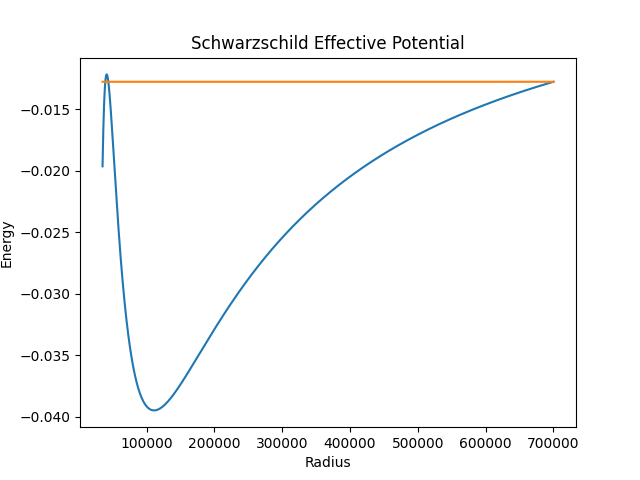

In [4]:
ra = np.linspace(3.5e4,7e5,100000)

U = np.zeros_like(ra)
for i in range(len(ra)):
  U[i] = (-G*M)/(ra[i]) + (L**2 / (2*ra[i]**2)) - (G * M * L**2)/(ra[i]**3)

U_p = np.zeros_like(ra)
U_p[0] = (-G*M)/(R) + (L**2 / (2*R**2)) - (G * M * L**2)/(R**3)
for i in range(len(ra)-1):
  U_p[i+1]=U_p[0]

fig5 = plt.figure()
plt.plot(ra,U)
plt.plot(ra,U_p)
plt.xlabel('Radius')
plt.ylabel('Energy')
plt.title('Schwarzschild Effective Potential')

#plt.savefig('Schw_potential_ellip.png', format='png')
plt.show()

In [5]:
theta_initial = (np.pi)/3
ptheta_initial = 0.0

pt_initial = secant(lambda pt: Constraint(R,0,0,pt,theta_initial,ptheta_initial,0) + (m/2),0,1)
r0 = np.array([R,0,0,pt_initial,theta_initial,ptheta_initial,0]) #R(0),pR(0),t(0),pt(0),theta(0),ptheta(0),phi(0)

initial_conditions = r0

#print(pt_initial)

ti_initial = 0
tf = 3e8
t_span = (ti_initial,tf)

start = time.time()
t_eval = np.linspace(ti_initial,tf,100000)

sol = solve_ivp(system_of_odes, t_span, initial_conditions, method='DOP853', t_eval = t_eval, rtol = 1e-8, atol = 1e-10)

const_change = np.array([-m/2])

for i in range(len(sol.t)-1):
    const_change = np.append(const_change,Constraint(sol.y[0,i],sol.y[1,i],sol.y[2,i],sol.y[3,i],sol.y[4,i],sol.y[5,i],sol.y[6,i]))
    
    
end = time.time()
print(end - start)

11.261203050613403


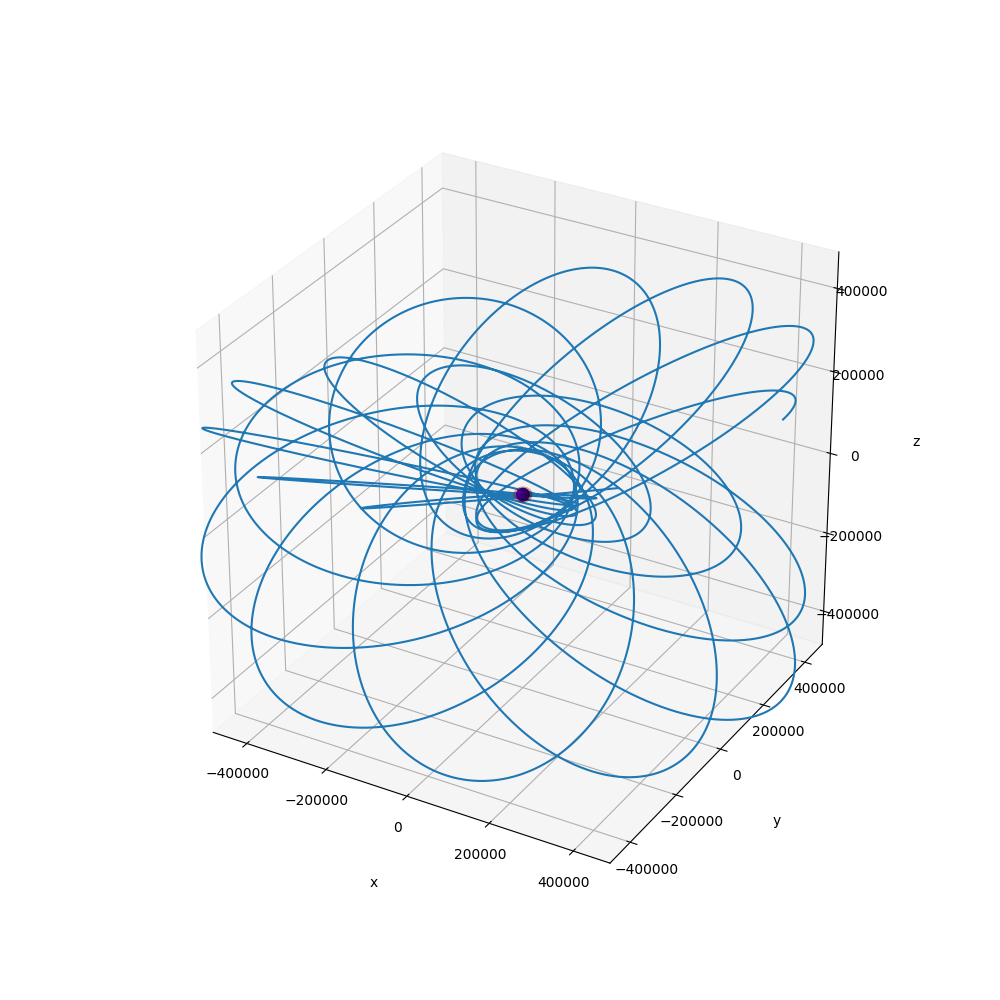

In [6]:
Theta = sol.y[4,:]
Phi = sol.y[6,:]
X = sol.y[0,:] * np.sin(Theta) * np.cos(Phi)
Y = sol.y[0,:] * np.sin(Theta) * np.sin(Phi)
Z = sol.y[0,:] * np.round(np.cos(Theta),14)

fig3 = plt.figure(figsize = (10,10))
ax1 = plt.axes(projection='3d')
ax1.grid()


ax1.plot3D(X,Y,Z)

u = np.linspace(0, 2. * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_outer = outer_horizon * np.outer(np.cos(u), np.sin(v))
y_outer = outer_horizon * np.outer(np.sin(u), np.sin(v))
z_outer = outer_horizon * np.outer(np.ones(np.size(u)), np.cos(v))

x_ergo = (M + np.sqrt(M**2 - (J/M)**2 * np.cos(v)**2)) * np.outer(np.cos(u), np.sin(v))
y_ergo = (M + np.sqrt(M**2 - (J/M)**2 * np.cos(v)**2)) * np.outer(np.sin(u), np.sin(v))
z_ergo = (M + np.sqrt(M**2 - (J/M)**2 * np.cos(v)**2)) * np.outer(np.ones(np.size(u)), np.cos(v))

ax1.plot_surface(x_outer,y_outer,z_outer, color = 'b')
ax1.plot_surface(x_ergo, y_ergo, z_ergo, color = 'r', alpha = 0.2)

zoom = 1.5

ax1.set_xlim([-R/zoom, R/zoom])
ax1.set_ylim([-R/zoom, R/zoom])
ax1.set_zlim([-R/zoom, R/zoom])

ax1.set_box_aspect([1,1,1])

ax1.set_xlabel('x', labelpad=20)
ax1.set_ylabel('y', labelpad=20)
ax1.set_zlabel('z', labelpad=20)

plt.show()

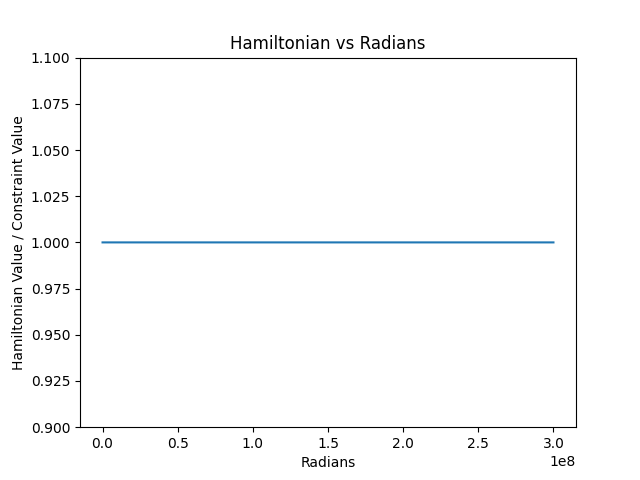

In [7]:
fig6 = plt.figure()
plt.plot(sol.t, const_change/(-m/2))
plt.ylim([0.9, 1.1])
plt.xlabel('Radians')
plt.ylabel('Hamiltonian Value / Constraint Value')
plt.title('Hamiltonian vs Radians')
#plt.savefig('Hamil_Restrict_eccenlow.png', format='png')
plt.show()

NameError: name 'r' is not defined

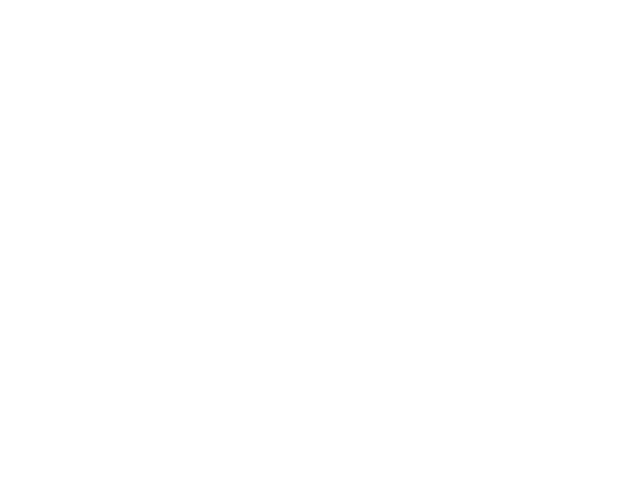

In [8]:
fig7 = plt.figure()
plt.plot(sol.t,(sol.y[0,:])/r)
plt.ylim([0.0, 1.5])
plt.xlabel('Proper Time')
plt.ylabel('Radius / Starting Radius')
plt.title('Radius Change, ')

#plt.savefig('Radius_whirl.png', format='png')
plt.show()

In [9]:
#Calculate change in eccentricity
r_max_peaks, _ = find_peaks(sol.y[0,:], height=0)
r_min_peaks, _ = find_peaks(-sol.y[0,:], height= -r)

eccen = np.array([],dtype=np.float128)
orb_periods = np.array([])

for i in range(min(len(r_min_peaks),len(r_max_peaks))):
    eccen_value = 1 - 2/((sol.y[0,r_max_peaks[i]]/sol.y[0,r_min_peaks[i]]) + 1)
    eccen = np.append(eccen,eccen_value)
    orb_periods = np.append(orb_periods,i)

fig8 = plt.figure()
#print(eccen)
plt.scatter(orb_periods,eccen)
plt.ylim([0.35, .95])
plt.xlabel('Orbital Periods')
plt.ylabel('Eccentricity')
plt.title('Eccentricity Change: ')

#plt.savefig('eccen_lowham.png', format='png')
plt.show()

NameError: name 'r' is not defined